In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user=pd.read_csv("./Data/takehome_users.csv", encoding = 'ISO-8859-1')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
# Initialize the "adopted_user" field in user dataframe
user = user.assign(adopted_user=np.zeros(len(user)))
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [4]:
engagement=pd.read_csv("./Data/takehome_user_engagement.csv", encoding = 'ISO-8859-1')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
len(engagement)

207917

In [6]:
# Only keep the date and ignore the hour
engagement['Date'] = pd.to_datetime(engagement['time_stamp'].apply(lambda item: item[:10]))

In [7]:
engagement.head()

,time_stamp,user_id,visited,Date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [8]:
engagement = engagement.sort_values(['user_id', 'Date'])
Ids = list(engagement.user_id.unique())
len(Ids)

8823

In [9]:
#Function to determine if criterion "logged into the product on three separate days in at least one sevenday period
def Adopted_user(item):
    flag = 0
    if len(item)<3:
        return 0
    else:
        for j in range(len(item)-2):
            if ((item.iloc[j+2] - item.iloc[j]).days<7) and (item.iloc[j+1] != item.iloc[j]) and (item.iloc[j+2] != item.iloc[j+1]):
                return 1
            elif j == len(item)-3:
                return 0

In [10]:
for i in Ids:
    entry_i = engagement.loc[engagement['user_id'] == i]
    
    #pass 0 and 1 indicators to user dataframe
    user.loc[user.object_id == i, 'adopted_user'] = Adopted_user(entry_i['Date'])

In [11]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [12]:
user['adopted_user'].value_counts()

0.0    10398
1.0     1602
Name: adopted_user, dtype: int64

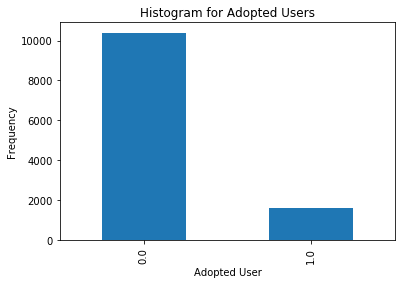

Number of each class
0.0    10398
1.0     1602
Name: adopted_user, dtype: int64


In [13]:
plt.figure(figsize=(6,4))
count_classes = pd.value_counts(user['adopted_user'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histogram for Adopted Users")
plt.xlabel("Adopted User")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()
print("Number of each class")
print(user['adopted_user'].value_counts())

In [14]:
# See if any missing values
pd.isnull(user).any()

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
adopted_user                  False
dtype: bool

In [15]:
# Replace missing value with 0
user.last_session_creation_time = user.last_session_creation_time.fillna(0)
user.invited_by_user_id = user.invited_by_user_id.fillna(0)

# Correlation - Chi Squred test

In [16]:
from scipy import stats

var_list = ['creation_source', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',   
            'org_id', 'invited_by_user_id']         

for i in range(len(var_list)):
    print('Variable:', var_list[i])
    #print('Cross Table:')
    T = pd.crosstab(user[var_list[i]], user.adopted_user)
    #print(T)
    print(stats.chi2_contingency(T), '\n')

Variable: creation_source
(92.284639765936475, 4.3058217090024059e-19, 4, array([[ 1874.2395,   288.7605],
       [ 3686.091 ,   567.909 ],
       [ 1829.1815,   281.8185],
       [ 1808.3855,   278.6145],
       [ 1200.1025,   184.8975]])) 

Variable: last_session_creation_time
(11999.999999999998, 2.7058998690135142e-103, 8821, array([[  2.75287050e+03,   4.24129500e+02],
       [  8.66500000e-01,   1.33500000e-01],
       [  8.66500000e-01,   1.33500000e-01],
       ..., 
       [  8.66500000e-01,   1.33500000e-01],
       [  8.66500000e-01,   1.33500000e-01],
       [  8.66500000e-01,   1.33500000e-01]])) 

Variable: opted_in_to_mailing_list
(0.73277186551317164, 0.39198619187082562, 1, array([[ 7803.699,  1202.301],
       [ 2594.301,   399.699]])) 

Variable: enabled_for_marketing_drip
(0.22279770974709384, 0.63691642256059933, 1, array([[ 8845.232,  1362.768],
       [ 1552.768,   239.232]])) 

Variable: org_id
(539.01030379008125, 4.2975282454675549e-05, 416, array([[  2.764135

# Random Forest

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import recall_score,precision_score,accuracy_score

In [18]:
#Encode 'creation_source'
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
user['creation__source']=le.fit_transform(user['creation_source']) 

In [19]:
var_list = ['creation__source',
            'last_session_creation_time',
            'opted_in_to_mailing_list',
            'enabled_for_marketing_drip',
            'org_id',
            'invited_by_user_id']

In [20]:
#Stratification
X = user.iloc[:, user.columns.isin(var_list)]  
y = user.iloc[:, user.columns == 'adopted_user']
X_train_total, X_test, y_train_total, y_test = train_test_split(X,y,test_size = 0.25, stratify=y, random_state = 0)
y_true = y_test['adopted_user'].values.ravel()

In [21]:
X_train_total.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation__source
1362,1.390385e+09,0,0,123,4449.0,0
9570,1.346755e+09,0,0,388,9481.0,0
7833,1.392751e+09,0,0,216,5579.0,0
10384,0.000000e+00,0,0,49,3322.0,1
292,1.401428e+09,0,0,0,1430.0,0


In [22]:
print("Total training set counts:")
print(y_train_total['adopted_user'].value_counts())
print(y_train_total['adopted_user'].value_counts(normalize=True))

Total training set counts:
0.0    7798
1.0    1202
Name: adopted_user, dtype: int64
0.0    0.866444
1.0    0.133556
Name: adopted_user, dtype: float64


In [23]:
print("Test set counts:")
print(y_test['adopted_user'].value_counts())
print(y_test['adopted_user'].value_counts(normalize=True))

Test set counts:
0.0    2600
1.0     400
Name: adopted_user, dtype: int64
0.0    0.866667
1.0    0.133333
Name: adopted_user, dtype: float64


In [24]:
#Train random forest with 50 trees
RF = RandomForestClassifier(n_estimators=50, max_features='sqrt', random_state=0)
RF.fit(X_train_total, y_train_total.values.ravel())
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

In [25]:
# Print the feature ranking
var_rank=[]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, var_list[indices[f]], importances[indices[f]]))
    var_rank.append(var_list[indices[f]])

Feature ranking:
1. creation__source (0.694895)
2. enabled_for_marketing_drip (0.167071)
3. org_id (0.096368)
4. invited_by_user_id (0.021212)
5. last_session_creation_time (0.010604)
6. opted_in_to_mailing_list (0.009850)


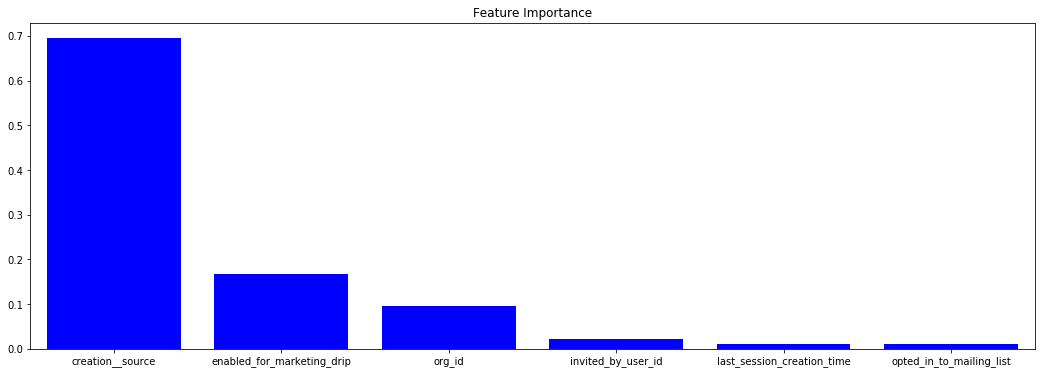

In [26]:
# Plot the feature importances of the forest
plt.figure(figsize=(18,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), var_rank)
plt.xlim([-0.5, X.shape[1]-0.5])
plt.show()

In [27]:
#predict on test set
y_pred = RF.predict(X_test)

In [28]:
print('Recall on Test:', recall_score(y_test, y_pred))
print('Precision on Test:', precision_score(y_test, y_pred))
print('Accuracy on Test:', accuracy_score(y_test, y_pred))

Recall on Test: 0.59
Precision on Test: 0.75641025641
Accuracy on Test: 0.92
